# Plot Data in a .NET Polyglot Notebook

This code demonstrates how to use [ScottPlot](https://scottplot.net) to display data visually inside a .NET Interactive notebook

## Setup

In [80]:
// Install the ScottPlot NuGet package
#r "nuget:ScottPlot"

// Setup a custom formatter to display plots as images
using Microsoft.DotNet.Interactive.Formatting;
using System;
using System.Collections.Generic;
using System.Drawing;
using System.IO;
using System.Linq;
using System.Text;
using System.Drawing.Drawing2D;
using System.Drawing.Imaging;

Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetImageHTML()), HtmlFormatter.MimeType);

Installed Packages ScottPlot, 4.1.64

## Quickstart

In [81]:
// create sample data
double[] xs = { 1, 2, 3, 4, 5 };
double[] ys = { 1, 4, 9, 16, 25 };

// plot the data
ScottPlot.Plot plt = new(400, 300);
plt.AddScatter(xs, ys);
plt.SaveFig("scatter-plot0.png");
// show the plot
plt




Error: System.Runtime.InteropServices.ExternalException (0x80004005): A generic error occurred in GDI+.
   at System.Drawing.Image.Save(String filename, ImageCodecInfo encoder, EncoderParameters encoderParams)
   at ScottPlot.Plot.SaveFig(String filePath, Nullable`1 width, Nullable`1 height, Boolean lowQuality, Double scale)
   at Submission#82.<<Initialize>>d__0.MoveNext()
--- End of stack trace from previous location ---
   at Microsoft.CodeAnalysis.Scripting.ScriptExecutionState.RunSubmissionsAsync[TResult](ImmutableArray`1 precedingExecutors, Func`2 currentExecutor, StrongBox`1 exceptionHolderOpt, Func`2 catchExceptionOpt, CancellationToken cancellationToken)

## Scatter Plot

In [89]:
// create sample data
double[] xs = ScottPlot.DataGen.RandomNormal(Random.Shared, 500);
double[] ys = ScottPlot.DataGen.RandomNormal(Random.Shared, 500);

// plot the data
ScottPlot.Plot plt = new(400, 300);
plt.AddScatterPoints(xs, ys);
plt.XLabel("Horizontal Axis");
plt.YLabel("Vertical Axis");
plt.Title("Scatter Plot");
plt.SaveFig("scatter-plot1.png");
// display the plot
plt



Error: System.Runtime.InteropServices.ExternalException (0x80004005): A generic error occurred in GDI+.
   at System.Drawing.Image.Save(String filename, ImageCodecInfo encoder, EncoderParameters encoderParams)
   at ScottPlot.Plot.SaveFig(String filePath, Nullable`1 width, Nullable`1 height, Boolean lowQuality, Double scale)
   at Submission#90.<<Initialize>>d__0.MoveNext()
--- End of stack trace from previous location ---
   at Microsoft.CodeAnalysis.Scripting.ScriptExecutionState.RunSubmissionsAsync[TResult](ImmutableArray`1 precedingExecutors, Func`2 currentExecutor, StrongBox`1 exceptionHolderOpt, Func`2 catchExceptionOpt, CancellationToken cancellationToken)

## Line Plot

In [83]:
// create sample data
double[] xs = ScottPlot.DataGen.Consecutive(500);
double[] ys = ScottPlot.DataGen.RandomWalk(Random.Shared, 500);

// plot the data
ScottPlot.Plot plt = new();
plt.AddScatterLines(xs, ys);
plt.XLabel("Horizontal Axis");
plt.YLabel("Vertical Axis");
plt.Title("Scatter Plot");
plt.SaveFig("scatter-plot2.png",1200,800);
// display the plot
plt



Error: System.Runtime.InteropServices.ExternalException (0x80004005): A generic error occurred in GDI+.
   at System.Drawing.Image.Save(String filename, ImageCodecInfo encoder, EncoderParameters encoderParams)
   at ScottPlot.Plot.SaveFig(String filePath, Nullable`1 width, Nullable`1 height, Boolean lowQuality, Double scale)
   at Submission#84.<<Initialize>>d__0.MoveNext()
--- End of stack trace from previous location ---
   at Microsoft.CodeAnalysis.Scripting.ScriptExecutionState.RunSubmissionsAsync[TResult](ImmutableArray`1 precedingExecutors, Func`2 currentExecutor, StrongBox`1 exceptionHolderOpt, Func`2 catchExceptionOpt, CancellationToken cancellationToken)

## Bar Graph


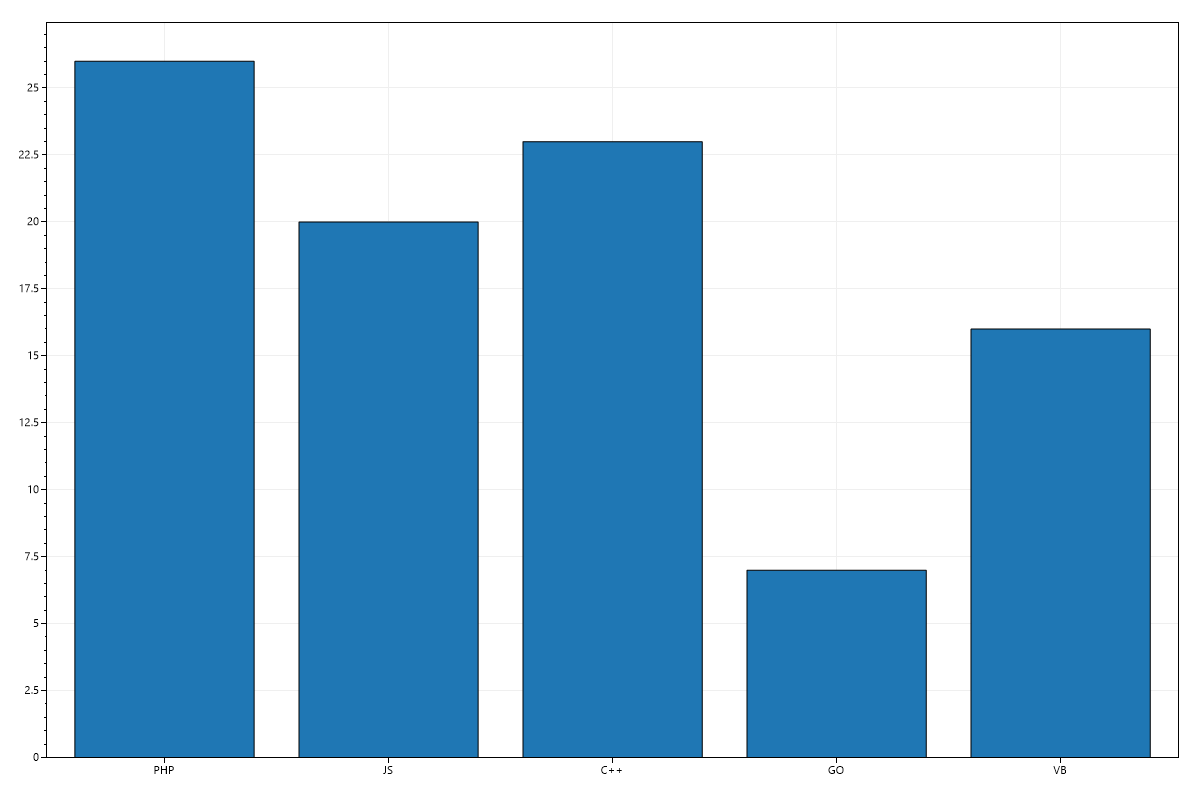

In [84]:
// create sample data
double[] values = { 26, 20, 23, 7, 16 };
double[] positions = { 0, 1, 2, 3, 4 };
string[] labels = { "PHP", "JS", "C++", "GO", "VB" };

// plot the data
ScottPlot.Plot plt = new();
plt.AddBar(values, positions);
plt.XTicks(positions, labels);
plt.SetAxisLimits(yMin: 0);
plt.SaveFig("scatter-plot3.png",1200,800);
// display the plot
plt



## Pie Chart


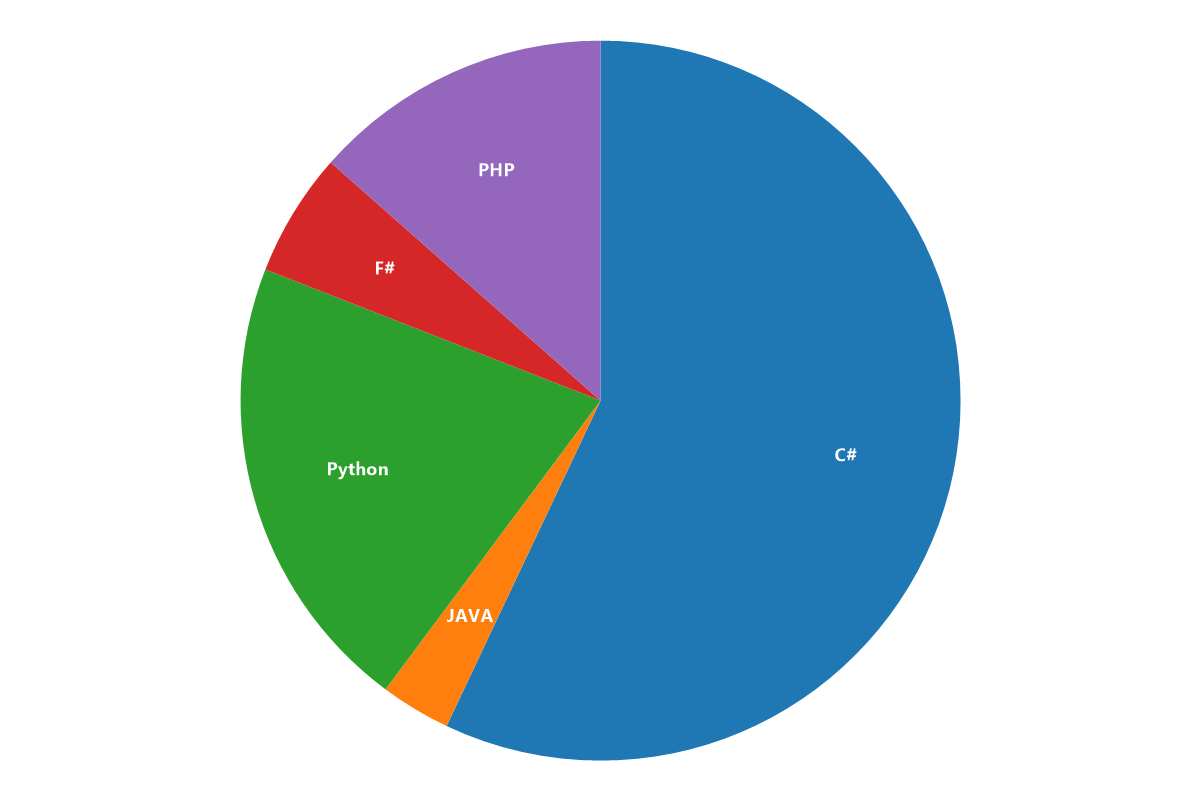

In [85]:
// create sample data
double[] values = { 778, 43, 283, 76, 184 };
string[] labels = { "C#", "JAVA", "Python", "F#", "PHP" };

// plot the data
ScottPlot.Plot plt = new();
var pie = plt.AddPie(values);
pie.SliceLabels = labels;
pie.ShowLabels = true;
plt.SaveFig("scatter-plot4.png",1200,800);
// show the plot
plt



## Additional Resources

* [ScottPlot Cookbook](https://scottplot.net/cookbook/)

In [86]:
const string folder = @"D:\Code\Jupyter";
Image img1 = Image.FromFile(Path.Combine(folder, "scatter-plot0.png"));
Bitmap map1 = new Bitmap(img1);
Image img2 = Image.FromFile(Path.Combine(folder, "scatter-plot1.png"));
Bitmap map2 = new Bitmap(img2);
Image img3 = Image.FromFile(Path.Combine(folder, "scatter-plot2.png"));
Bitmap map3 = new Bitmap(img3);
var width = Math.Max(img1.Width, img2.Width);
var height = img1.Height + img2.Height + 10;
// 初始化画布(最终的拼图画布)并设置宽高
Bitmap bitMap = new Bitmap(width, height);
// 初始化画板
Graphics g1 = Graphics.FromImage(bitMap);
// 将画布涂为白色(底部颜色可自行设置)
g1.FillRectangle(Brushes.White, new Rectangle(0, 0, width, height));
//在x=0，y=0处画上图一
g1.DrawImage(map1, 0, 0, img1.Width, img1.Height);
//在x=0，y在图一往下10像素处画上图二
g1.DrawImage(map2, 0, img1.Height + 10, img2.Width, img2.Height);
g1.DrawImage(map3, 0, img1.Height + 10, img3.Width, img3.Height);
map1.Dispose();
map2.Dispose();
map3.Dispose();
Image img = bitMap;
//保存
img.Save(Path.Combine(folder, "new测试1.png"));
img.Dispose();

In [87]:
        // 加载要合并的图片
        Image image1 = Image.FromFile("scatter-plot0.png");
        Image image2 = Image.FromFile("scatter-plot2.png");
        Image image3 = Image.FromFile("scatter-plot3.png");
        Image image4 = Image.FromFile("scatter-plot4.png");

        // 创建合并后的图片大小
        int mergedWidth = Math.Max(image1.Width, image2.Width) + Math.Max(image3.Width, image4.Width);
        int mergedHeight = Math.Max(image1.Height, image3.Height) + Math.Max(image2.Height, image4.Height);

        // 创建一个新的位图对象作为合并后的图片
        Bitmap mergedImage = new Bitmap(mergedWidth, mergedHeight);

        // 创建一个绘图对象，用于绘制合并后的图片
        Graphics graphics = Graphics.FromImage(mergedImage);
        graphics.InterpolationMode = InterpolationMode.HighQualityBicubic;

        // 绘制第一张图片
        graphics.DrawImage(image1, new Rectangle(0, 0, image1.Width, image1.Height));

        // 绘制第二张图片
        graphics.DrawImage(image2, new Rectangle(image1.Width, 0, image2.Width, image2.Height));

        // 绘制第三张图片
        graphics.DrawImage(image3, new Rectangle(0, image1.Height, image3.Width, image3.Height));

        // 绘制第四张图片
        graphics.DrawImage(image4, new Rectangle(image3.Width, image2.Height, image4.Width, image4.Height));

        // 在合并后的图片上添加文字
        using (Font font = new Font("Arial", 12))
        using (SolidBrush brush = new SolidBrush(Color.Black))
        {
            graphics.DrawString("Hello, World!", font, brush, new PointF(10, 10));
        }

        // 保存合并后的图片
        mergedImage.Save("mergedImage.jpg", ImageFormat.Jpeg);

        // 释放资源
        graphics.Dispose();
        mergedImage.Dispose();
        image1.Dispose();
        image2.Dispose();
        image3.Dispose();
        image4.Dispose();